In [1]:
import pandas as pd
import numpy as np
import gc

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset and Reducing memory

In [3]:
'''
# setting reading types
dtypes = {
    "row_id" : "str",
    "time_id" : "uint16",
    "investment_id" : "uint16",
    "target " : 'float32',    
}
for i in range(300):
    dtypes[f'f_{i}'] = 'float32'
'''

'\n# setting reading types\ndtypes = {\n    "row_id" : "str",\n    "time_id" : "uint16",\n    "investment_id" : "uint16",\n    "target " : \'float32\',    \n}\nfor i in range(300):\n    dtypes[f\'f_{i}\'] = \'float32\'\n'

In [4]:
'''
%%time
train_df = pd.read_csv("../input/ubiquant-market-prediction/train.csv", dtype=dtypes)
train_df.head()
'''

'\n%%time\ntrain_df = pd.read_csv("../input/ubiquant-market-prediction/train.csv", dtype=dtypes)\ntrain_df.head()\n'

In [5]:
#gc.collect()

In [6]:
#print(train_df.info())

In [7]:
'''
def reduce_memory_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2 # Unit: MB
    print('Memory usage of input dataframe: {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        # categorical data
        if col_type == object:
            df[col] = df[col].astype('category')
        # numerical data
        else:
            c_min = df[col].min()
            c_max = df[col].max()
            # integer
            if str(col_type)[:3] == 'int' or str(col_type)[:4] == 'uint':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            # float
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
'''

'\ndef reduce_memory_usage(df):\n    """ iterate through all the columns of a dataframe and modify the data type\n        to reduce memory usage.        \n    """\n    start_mem = df.memory_usage().sum() / 1024**2 # Unit: MB\n    print(\'Memory usage of input dataframe: {:.2f} MB\'.format(start_mem))\n    \n    for col in df.columns:\n        col_type = df[col].dtype\n        # categorical data\n        if col_type == object:\n            df[col] = df[col].astype(\'category\')\n        # numerical data\n        else:\n            c_min = df[col].min()\n            c_max = df[col].max()\n            # integer\n            if str(col_type)[:3] == \'int\' or str(col_type)[:4] == \'uint\':\n                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:\n                    df[col] = df[col].astype(np.int8)\n                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n                    df[col] = df[col].astype(np.int16)\n                eli

In [8]:
'''
train_df_1 = reduce_memory_usage(train_df)

del train_df
_ = gc.collect()
'''

'\ntrain_df_1 = reduce_memory_usage(train_df)\n\ndel train_df\n_ = gc.collect()\n'

In [9]:
#train_df_1.info()

In [10]:
#train_df_1.to_pickle('train_df.pkl')

In [11]:
%%time
train_df = pd.read_pickle("./train_df.pkl")
train_df.head()

CPU times: user 974 ms, sys: 2.07 s, total: 3.05 s
Wall time: 7.52 s


,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300781,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,...,0.365967,-1.095703,0.200073,0.819336,0.941406,-0.086792,-1.086914,-1.044922,-0.287598,0.321533
1,0_2,0,2,-0.231079,0.811035,-0.514160,0.742188,-0.616699,-0.194214,1.771484,...,-0.154175,0.912598,-0.734375,0.819336,0.941406,-0.387695,-1.086914,-0.929688,-0.974121,-0.343506
2,0_6,0,6,0.568848,0.394043,0.615723,0.567871,-0.607910,0.068909,-1.083008,...,-0.138062,0.912598,-0.551758,-1.220703,-1.060547,-0.219116,-1.086914,-0.612305,-0.113953,0.243652
3,0_7,0,7,-1.064453,-2.343750,-0.011871,1.875000,-0.606445,-0.586914,-0.815918,...,0.382080,0.912598,-0.266357,-1.220703,0.941406,-0.608887,0.104919,-0.783203,1.151367,-0.773438
4,0_8,0,8,-0.531738,0.842285,-0.262939,2.330078,-0.583496,-0.618164,-0.742676,...,-0.170410,0.912598,-0.741211,-1.220703,0.941406,-0.588379,0.104919,0.753418,1.345703,-0.737793


In [12]:
#del train_df_1
#_ = gc.collect()

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141410 entries, 0 to 3141409
Columns: 304 entries, row_id to f_299
dtypes: category(1), float16(301), int16(2)
memory usage: 1.8 GB


In [14]:
train_df.describe()

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
count,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,...,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06
mean,6.654862e+02,1.885265e+03,NaN,1.633644e-03,-1.258850e-02,8.499146e-03,-1.992798e-02,-5.428314e-03,-3.021240e-03,1.940727e-03,...,1.258850e-02,8.964539e-04,-6.500244e-03,2.836227e-03,-4.730225e-03,NaN,-1.508713e-03,-7.053375e-03,-4.215240e-03,-4.329681e-03
std,3.560434e+02,1.083616e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,0.000000e+00,0.000000e+00,-9.421875e+00,-1.765625e+01,-6.578125e+00,-8.640625e+00,-1.800000e+01,-4.000000e+00,-8.835938e+00,-6.382812e+00,...,-9.273438e+00,-6.359375e+00,-8.187500e+00,-2.400000e+01,-1.497656e+01,-9.351562e+00,-7.367188e+00,-7.578125e+00,-6.707031e+00,-1.028125e+01
25%,3.530000e+02,9.520000e+02,-5.004883e-01,-4.072266e-01,-6.811523e-01,-6.533203e-01,-4.497070e-01,-3.532715e-01,-7.070312e-01,-7.910156e-01,...,-6.035156e-01,-8.354492e-01,-6.982422e-01,-1.376953e-01,-9.399414e-01,-5.146484e-01,-9.575195e-01,-7.241211e-01,-8.164062e-01,-5.078125e-01
50%,7.040000e+02,1.882000e+03,-9.716797e-02,2.431641e-01,-4.867554e-02,4.351807e-02,-2.639160e-01,-1.909180e-01,-2.145386e-02,1.438141e-02,...,6.085205e-02,-2.022705e-01,-1.910400e-01,2.164307e-01,2.087402e-01,-2.907715e-01,6.954193e-03,-1.650391e-01,2.301025e-02,-2.824707e-01
75%,9.750000e+02,2.830000e+03,3.571777e-01,6.650391e-01,6.088867e-01,6.586914e-01,7.763672e-02,2.784729e-02,6.835938e-01,8.007812e-01,...,6.884766e-01,9.038086e-01,4.841309e-01,5.087891e-01,8.618164e-01,1.275635e-01,9.501953e-01,6.098633e-01,7.983398e-01,1.411133e-01
max,1.219000e+03,3.773000e+03,1.203906e+01,7.843750e+00,8.710938e+00,8.007812e+00,4.706250e+01,7.662500e+01,7.644531e+00,6.777344e+00,...,9.296875e+00,9.726562e+00,2.231250e+01,6.585938e+00,6.976562e+00,6.140625e+01,7.679688e+00,1.242188e+01,7.003906e+00,4.337500e+01


# Visulalization

## time_id

<Figure size 432x288 with 0 Axes>

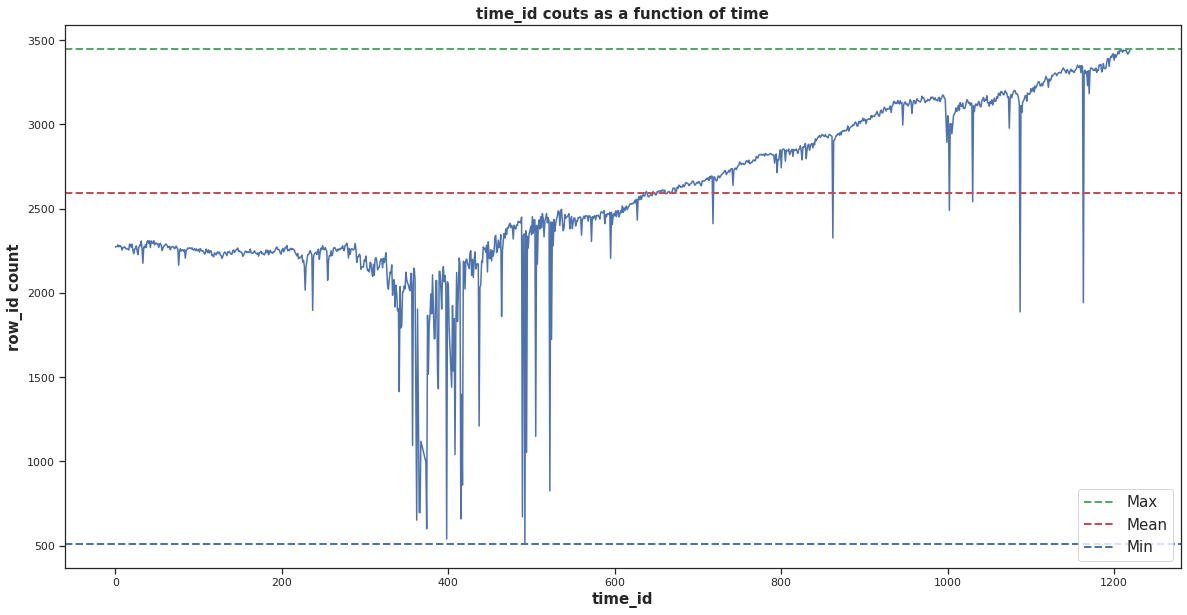

time_id count
 -------------
	 unique count : 1211
	 mean : 2594.0627580511973
	 max : 3445
	 min : 512


In [102]:
time_ids = train_df.groupby("time_id").size()

sns.set(style = "ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data = time_ids, x = time_ids.index, y = time_ids.values)
ax.set_xlabel('time_id', fontsize = 15, weight = 'bold')
ax.set_ylabel('row_id count', fontsize = 15, weight = 'bold')
ax.axhline(time_ids.values.max(), label="Max", color = "g", linewidth = 2, linestyle ="--")
ax.axhline(time_ids.values.mean(), label="Mean", color = "r", linewidth = 2, linestyle ="--")
ax.axhline(time_ids.values.min(), label="Min", color = "b", linewidth = 2, linestyle ="--")
ax.legend(prop={'size':15}, loc ='lower right')

plt.title('time_id couts as a function of time',fontsize = 15, weight = 'bold')
plt.show()

print("time_id count\n",'-'*len(str('time_id count')))
print(f"\t unique count : {len(train_df['time_id'].unique())}")
print(f"\t mean : {time_ids.values.mean()}")
print(f"\t max : {time_ids.values.max()}")
print(f"\t min : {time_ids.values.min()}")


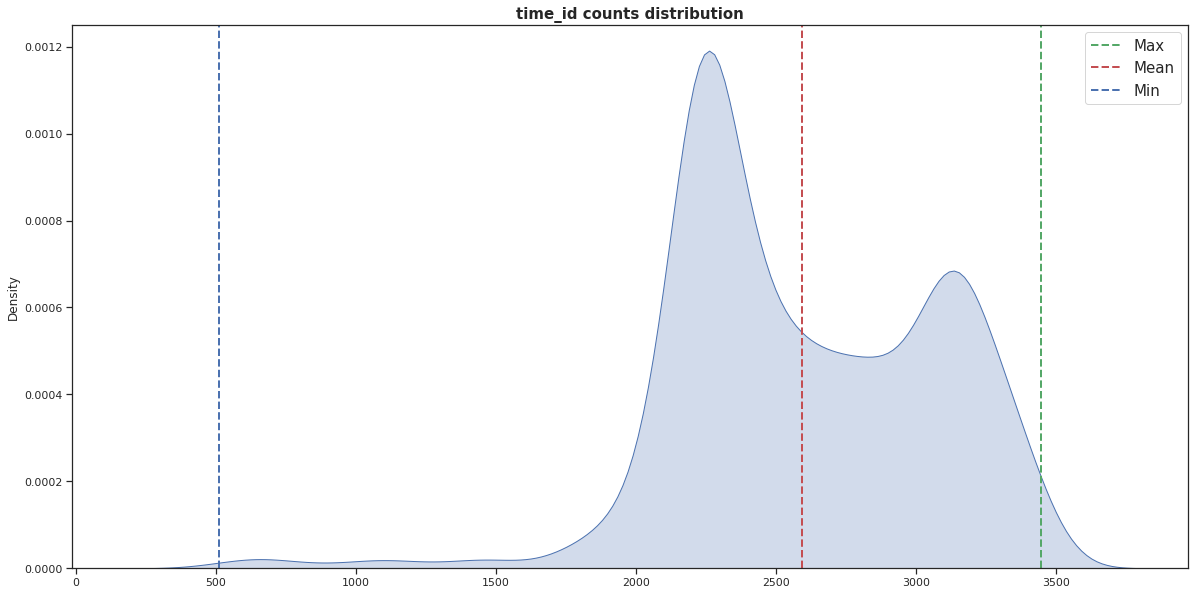

In [105]:
plt.figure(figsize = (20, 10))
ax = sns.kdeplot(time_ids, fill = True)
ax.axvline(time_ids.values.max(), label="Max", color = "g", linewidth = 2, linestyle ="--")
ax.axvline(time_ids.values.mean(), label="Mean", color = "r", linewidth = 2, linestyle ="--")
ax.axvline(time_ids.values.min(), label="Min", color = "b", linewidth = 2, linestyle ="--")
ax.legend(prop={'size':15}, loc ='upper right')
plt.title('time_id counts distribution',fontsize = 15, weight = 'bold')
plt.show()

## investment_id

### References
https://www.kaggle.com/code/yoshikuwano/fast-read-data-and-memory-optimization/notebook   
https://www.kaggle.com/code/rohanrao/tutorial-on-reading-large-datasets/notebook#Format:-csv    
https://www.kaggle.com/code/sytuannguyen/ubiquant-data-preparation#3.-Save-the-reduced-dataframe   
